In [1]:
# NumPyをインポート
import numpy as np
# keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# MNISTデータセットをインポート
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# MNISTデータセットをダウンロードして変数に代入する
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# MNISTデータセットの形状を調べる
print(x_train.shape)  # 出力：(60000, 28, 28)
print(y_train.shape)  # 出力：(60000,)
print(x_test.shape)   # 出力：(10000, 28, 28)
print(y_test.shape)   # 出力：(10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# x_trainsに格納されている1つ目の画像データを出力
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

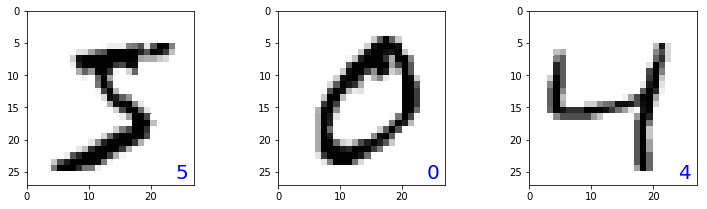

In [5]:
# 先頭から3つ目までの手書き数字と正解ラベルを出力する

# グラフをNotebook上に出力する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    # 784個のRGB値を28×28の行列に変換する
    img = x_train[id, :, :].reshape(28, 28)
    # 色相を反転させてプロットする
    plt.pcolor(255 - img)
    # 画像の正解値をプロット
    plt.text(24, 26, "%d" % y_train[id],
             color='blue', fontsize=20)
    plt.xlim(0, 27) # x軸を0~28の範囲
    plt.ylim(27, 0) # y軸を28~0の範囲
plt.show()

In [6]:
# データの前処理

# 訓練データ(60000, 28, 28)の3階テンソルを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(60000, 784)
# float32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train = x_train / 255
# テストデータ(10000, 28, 28)の3階テンソルを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(10000, 784)
# テストデータをfloat32(浮動小数点数)型に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test = x_test / 255

# 正解ラベルの数
correct = 10
# 訓練データの正解ラベルをワンホット符号化法で変換
y_train = np_utils.to_categorical(y_train, correct)
# テストデータの正解ラベルをワンホット符号化法で変換
y_test = np_utils.to_categorical(y_test, correct)

In [7]:
# ニューラルネットワークの構築
# keras.modelsからSequentialをインポート
from keras.models import Sequential
# keras.layersからDense、Activationをインポート
from keras.layers import Dense, Activation
# keras.optimizersからSGDをインポート
from keras.optimizers import SGD

model = Sequential()                 # Sequentialオブジェクトの生成

## 隠れ層
model.add(Dense(200,                 # 隠れ層のニューロン数は200
                input_dim=784,       # 入力層のニューロン数は784
                activation='relu'    # 活性化関数はReLU
               ))

## 出力層
model.add(Dense(10,                  # 出力層のニューロン数は10
                activation='sigmoid' # 活性化関数はsigmoid
               ))


# モデルオブジェクトのコンパイル
learning_rate = 0.5                  # 学習率
model.compile(                       # オブジェクトのコンパイル
    loss='categorical_crossentropy', # 損失の基準は交差エントロピー誤差
    optimizer=SGD(lr=learning_rate), # 学習方法を確率的勾配降下法にする
    metrics=['accuracy']             # 学習評価として正解率を指定
    )
model.summary() # ニューラルネットワークのサマリー（概要）を出力

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 学習を行って結果を出力
# 時間を計測するライブラリをインポート
import time

startTime = time.time()
history = model.fit(x_train,           # 訓練データ
                    y_train,           # 正解ラベル
                    epochs=5,          # 学習を繰り返す回数
                    batch_size=100,    # 勾配計算に用いるサンプル数
                    verbose=1,         # 学習の進捗状況を出力する
                    validation_data=(
                        x_test, y_test # テストデータの指定
                    ))
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの誤り率を出力
print('Test loss:', score[0])
# テストデータの正解率を出力
print('Test accuracy:', score[1])
# 処理にかかった時間を出力
print("Time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3192 - acc: 0.9061 - val_loss: 0.1234 - val_acc: 0.9624
Epoch 2/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.1172 - acc: 0.9662 - val_loss: 0.0965 - val_acc: 0.9703
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0832 - acc: 0.9759 - val_loss: 0.0849 - val_acc: 0.9740
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0619 - acc: 0.9815 - val_loss: 0.0724 - val_acc: 0.9774
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0501 - acc: 0.9848 - val_loss: 0.0779 - val_acc: 0.9757
Test loss: 0.07786955690863542
Test accuracy: 0.9757
Time:8.045 sec


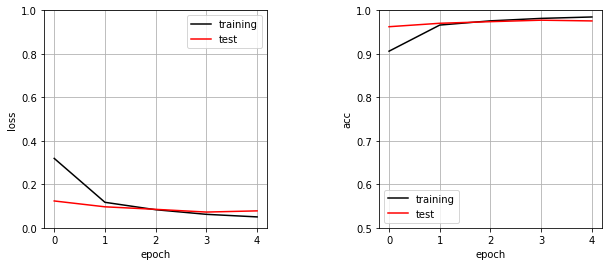

In [9]:
# 損失（誤り率）、正解率をグラフにする

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(10, 4))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.5)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['acc'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_acc'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()